<a href="https://colab.research.google.com/github/arnajaganguly123/Google-Stock-Price-Prediction/blob/main/Machine_Learning_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline

In [24]:
data =pd.read_csv("/content/Google_Stock_Price_Train.csv")
data.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [25]:
train=data.iloc[:,1:2].values
print(train)
print(train.shape)

[[325.25]
 [331.27]
 [329.83]
 ...
 [793.7 ]
 [783.33]
 [782.75]]
(1258, 1)


In [26]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range =(0,1))
scaled_ts=scaler.fit_transform(train)
scaled_ts

array([[0.08581368],
       [0.09701243],
       [0.09433366],
       ...,
       [0.95725128],
       [0.93796041],
       [0.93688146]])

In [28]:
x_train=[]
y_train=[]
for i in range (60,1258):
  x_train.append(scaled_ts[i-60:i,0])
  y_train.append(scaled_ts[i,0])
x_train=np.array(x_train)
y_train=np.array(y_train)
print(x_train.shape)
print(y_train.shape)

(1198, 60)
(1198,)


In [29]:
x_train=np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
x_train.shape

(1198, 60, 1)

In [30]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Dropout 


In [31]:
regressor= Sequential()
regressor.add(LSTM(units=50,return_sequences=True, input_shape=(x_train.shape[1],1)))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units=50,return_sequences=True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units=50,return_sequences=True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units=50))
regressor.add(Dropout(0.2))
regressor.add(Dense(units=1))

In [37]:
regressor.compile(optimizer='adam',loss='mean_squared_error')
regressor.fit(x_train,y_train,epochs=100,batch_size=32)

Epoch 1/100
38/38 [==============================] - 16s 156ms/step - loss: 0.0322
Epoch 2/100
38/38 [==============================] - 6s 145ms/step - loss: 0.0064
Epoch 3/100
38/38 [==============================] - 5s 122ms/step - loss: 0.0054
Epoch 4/100
38/38 [==============================] - 5s 125ms/step - loss: 0.0049
Epoch 5/100
38/38 [==============================] - 5s 128ms/step - loss: 0.0052
Epoch 6/100
38/38 [==============================] - 5s 123ms/step - loss: 0.0047
Epoch 7/100
38/38 [==============================] - 5s 124ms/step - loss: 0.0048
Epoch 8/100
38/38 [==============================] - 6s 158ms/step - loss: 0.0041
Epoch 9/100
38/38 [==============================] - 5s 128ms/step - loss: 0.0045
Epoch 10/100
38/38 [==============================] - 5s 123ms/step - loss: 0.0045
Epoch 11/100
38/38 [==============================] - 5s 141ms/step - loss: 0.0042
Epoch 12/100
38/38 [==============================] - 5s 122ms/step - loss: 0.0042
Epoch 13/100

In [39]:
data_test=pd.read_csv("/content/Google_Stock_Price_Test.csv")
atcual=data_test.iloc[:,1:2].values

In [41]:
data_total=pd.concat((data['Open'],data_test['Open']),axis=0)
inputs=data_total[len(data_total)-len(data_test)-60:].values
inputs=inputs.reshape(-1,1)
inputs=scaler.transform(inputs)
x_test=[]
for i in range(60,80):
  x_test.append(inputs[i-60:i,0])
x_test=np.array(x_test)
x_test=np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

In [42]:
predicted=regressor.predict(x_test)
predicted=scaler.inverse_transform(predicted)

1/1 [==============================] - 2s 2s/step


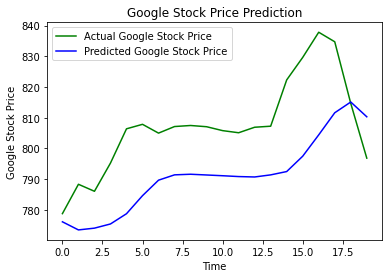

In [44]:
plt.plot(atcual,color='green',label='Actual Google Stock Price')
plt.plot(predicted,color='blue',label='Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()